<a href="https://colab.research.google.com/github/BrunoMinetti/Colab/blob/main/JornadaPython_Ciencia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jornada Python: Ciência de Dados - Resolvendo problemas reais com Python e Pandas

---
Autor: Bruno Cesar Minetti Sanches<p>
GitHub: https://github.com/BrunoMinetti<p>
Linkedin: https://www.linkedin.com/in/brunocmsanches/<p>

---
###Breve currículo:<p> 
Gestor de Trânsito | Tecnólogo em Microeletrônica | Estudante de Análise e Desenvolvimento de Sistemas | Entusiasta da Ciência de Dados

---



Esta atividade é composta por duas partes com a seguinte programação:

Ciência de Dados: Resolvendo problemas reais com Python e Pandas (Parte 1 e 2) [19/03]

Totalizando a Carga Horária de 6 Horas.

Ao se inscrever nesta atividade você estará automaticamente inscrito(a) nas demais partes.

Todos os links serão enviados por e-mail com antecedência.

Este evento faz parte da Jornada de Python.

Público Alvo: Estudantes, Profissionais, interessados em geral.
Pré-Requisitos: Acima de 18 anos.
Duração: 3 hora(s), das 14:00 às 17:00 mais 3 hora(s), das 18:00 às 21:00
Palestrante: Prof. Paulo Salvatore e Prof. Guilherme Feulo
Informações Adicionais: Horário de Brasília. Informações de acesso serão enviadas por e-mail.

Essa competição tem como objetivo ser uma tarefa prática para o curso de ciência de dados ministrado pela Ocean Brasil em 19/03/2021.

Nele trabalharemos com um dataset utilizado no artigo:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

A avaliação será feita em uma parte ja destacada do dataset utilzando a métrica Mean F1-Score.

Formato de Submissão
A submissão deve ser realizada seguindo o padrão do arquivo de exemplo disponibilizado junto com o dataset. Um arquivo csv com o cabeçalho:

id,y
Seguido das linhas com as predições realizadas por você para cada entradado arquivo de teste.

Informações dos atributos. Conhecendo as Features:

- Atributos de Entrada:

- Relacionadas a informação bancária (Dados anonimizados):

1. age (numeric)

2. job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5. default: has credit in default? (categorical: "no","yes","unknown")

6. housing: has housing loan? (categorical: "no","yes","unknown")

7. loan: has personal loan? (categorical: "no","yes","unknown")

- Relacionadas com o último contato dessa mesma campanha:

8. contact: contact communication type (categorical: "cellular","telephone")

9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- Outros atributos:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14. previous: number of contacts performed before this campaign and for this client (numeric)

15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

- Atributos de contexto social e econômico:

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)

17. cons.price.idx: consumer price index - monthly indicator (numeric)

18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19. euribor3m: euribor 3 month rate - daily indicator (numeric)

20. nr.employed: number of employees - quarterly indicator (numeric)

- Atributo Alvo:

21. y : has the client subscribed a term deposit? (binary: "yes","no")

Site: https://www.kaggle.com/c/jornada-python-ocean/

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Conhecendo o Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Jornada_Python_Ocean/train.csv', index_col='id')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
0,52,technician,divorced,professional.course,NaN,yes,no,telephone,jun,mon,56,8,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
1,36,management,married,university.degree,no,yes,no,cellular,nov,tue,267,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
2,53,blue-collar,married,high.school,no,yes,yes,cellular,jul,mon,243,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
3,45,blue-collar,single,basic.9y,no,yes,no,cellular,aug,wed,249,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,no
4,60,housemaid,married,high.school,NaN,yes,no,telephone,may,wed,74,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37069 entries, 0 to 37068
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             36773 non-null  object 
 2   marital         37000 non-null  object 
 3   education       35505 non-null  object 
 4   default         29296 non-null  object 
 5   housing         36176 non-null  object 
 6   loan            36176 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  duration        37069 non-null  int64  
 11  campaign        37069 non-null  int64  
 12  pdays           37069 non-null  int64  
 13  previous        37069 non-null  int64  
 14  poutcome        37069 non-null  object 
 15  emp.var.rate    37069 non-null  float64
 16  cons.price.idx  37069 non-null  float64
 17  cons.conf.idx   37069 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,40.023497,258.185492,2.566862,962.058189,0.173946,0.082222,93.576416,-40.505555,3.620484,5166.966047
std,10.412653,259.579105,2.765626,187.939691,0.497441,1.571009,0.578585,4.623600,1.735310,72.360902
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,36773,37000,35505,29296,36176,36176,37069,37069,37069,37069,37069
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,9364,22424,10967,29293,19432,30518,23515,12424,7735,31989,32893


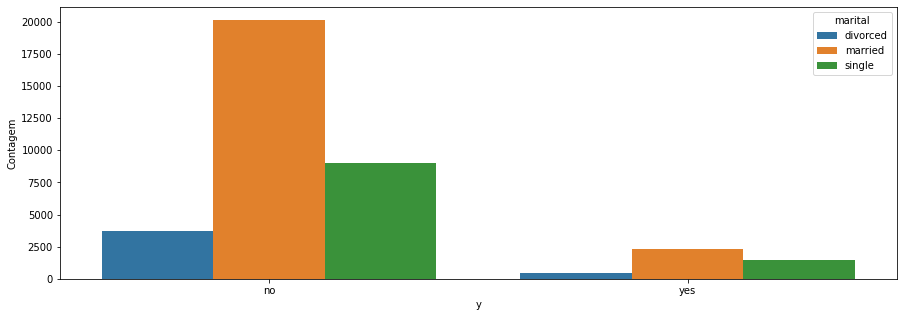

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='y', hue='marital')
plt.ylabel('Contagem')
plt.show()

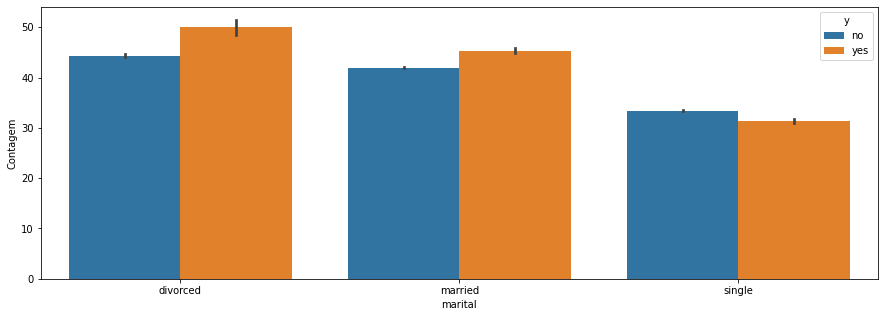

In [9]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x='marital', y='age', hue='y')
plt.ylabel('Contagem')
plt.show()

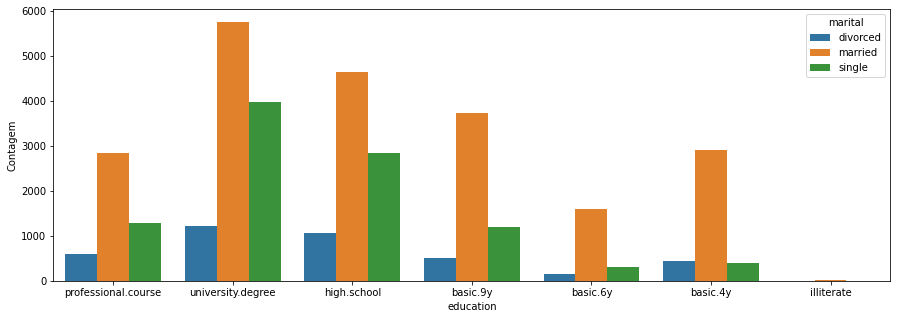

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='education', hue='marital')
plt.ylabel('Contagem')
plt.show()

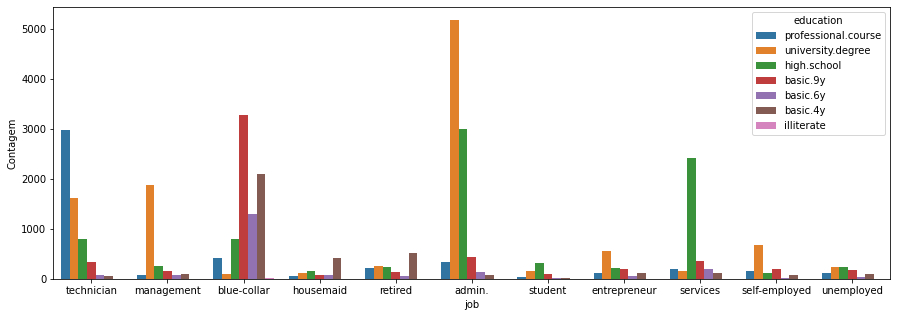

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='job', hue='education')
plt.ylabel('Contagem')
plt.show()

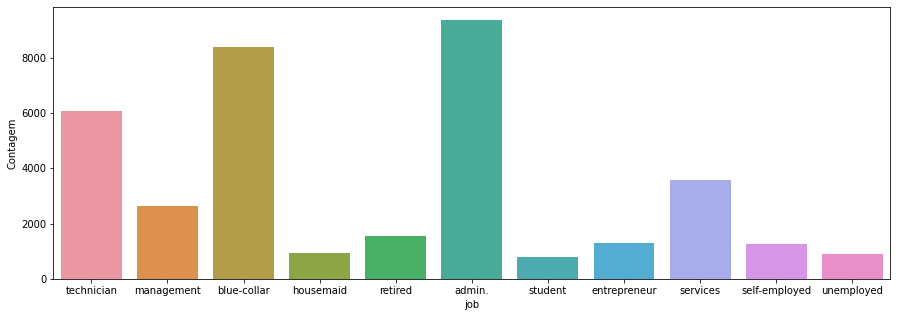

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='job')
plt.ylabel('Contagem')
plt.show()

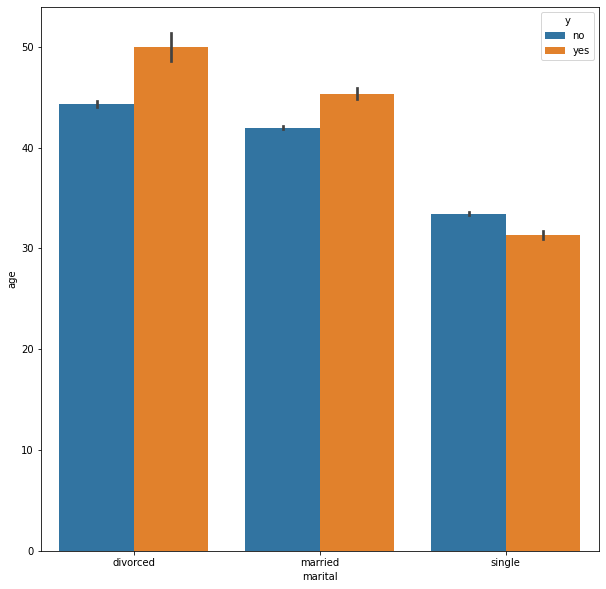

In [13]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, x='marital', y='age', hue='y')
plt.show()

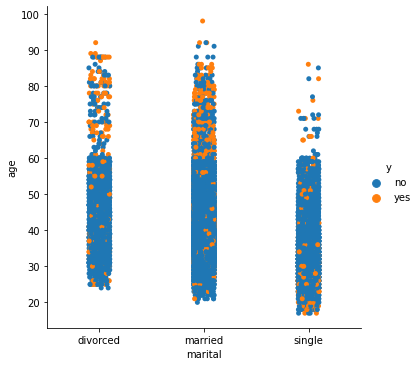

In [14]:
sns.catplot(data=df, x='marital', y='age', hue='y')
plt.show()

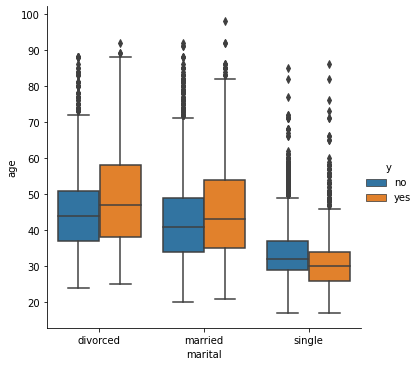

In [15]:
sns.figsize=(20,10)
sns.catplot(data=df, x='marital', y='age', hue='y', kind='box')
plt.show()

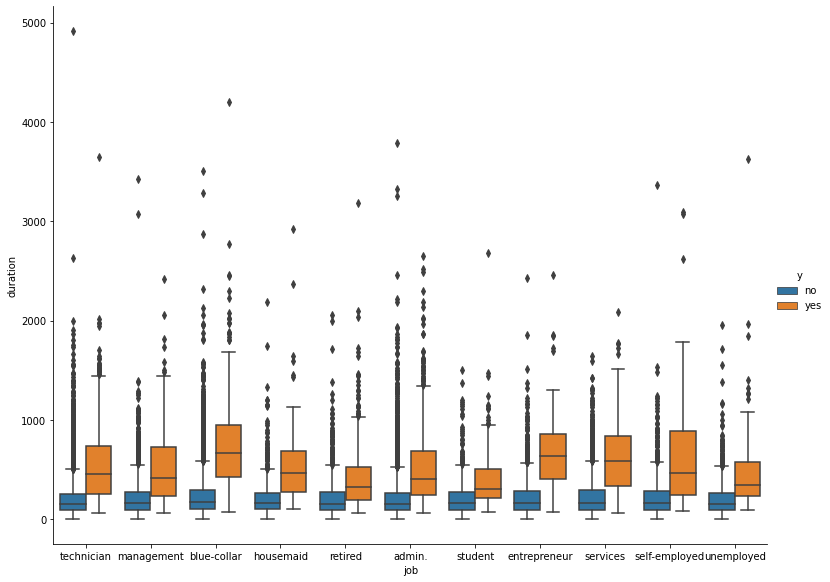

In [16]:
sns.catplot(data=df, x='job', y='duration', hue='y', kind='box', aspect=8/6, height=8);

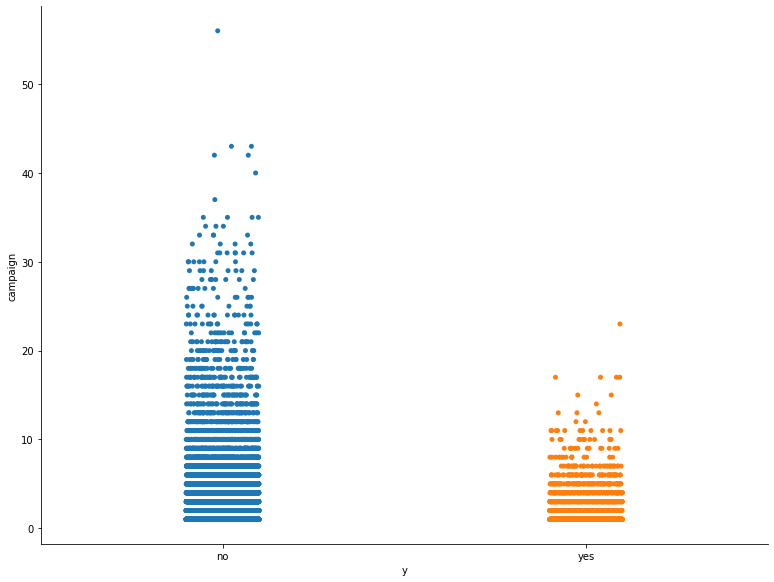

In [17]:
sns.catplot(data=df, x='y', y='campaign', aspect=8/6, height=8);

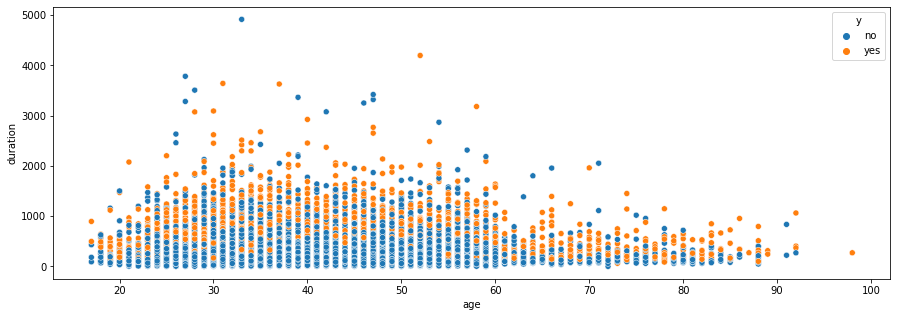

In [18]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='age', y='duration', data=df, hue='y')
plt.show()

In [19]:
df[df.duration<=10].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,38.906250,7.631250,5.893750,986.609375,0.146875,-0.416562,93.664813,-42.614063,2.791716,5127.720938
std,9.935716,2.066669,5.965519,110.304653,0.462028,1.449205,0.626104,3.739624,1.850787,92.926943
min,21.000000,0.000000,1.000000,0.000000,0.000000,-1.800000,92.893000,-49.500000,0.655000,4963.600000
25%,31.000000,6.750000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,1.250000,5099.100000
50%,37.000000,8.000000,4.000000,999.000000,0.000000,-1.100000,93.918000,-42.000000,1.405000,5099.100000
75%,46.250000,9.000000,7.000000,999.000000,0.000000,1.400000,94.203000,-40.300000,4.959000,5228.100000
max,72.000000,10.000000,31.000000,999.000000,4.000000,1.400000,94.601000,-34.800000,4.968000,5228.100000


# Modelando

In [88]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, classification_report ,accuracy_score
from sklearn import svm 
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold, RepeatedStratifiedKFold

In [21]:
#Transforma as categorias em números
for c in df.columns[df.dtypes == object]: # df.dtypes == 'object'
    df[c] = df[c].astype('category')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37069 entries, 0 to 37068
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             37069 non-null  int64   
 1   job             36773 non-null  category
 2   marital         37000 non-null  category
 3   education       35505 non-null  category
 4   default         29296 non-null  category
 5   housing         36176 non-null  category
 6   loan            36176 non-null  category
 7   contact         37069 non-null  category
 8   month           37069 non-null  category
 9   day_of_week     37069 non-null  category
 10  duration        37069 non-null  int64   
 11  campaign        37069 non-null  int64   
 12  pdays           37069 non-null  int64   
 13  previous        37069 non-null  int64   
 14  poutcome        37069 non-null  category
 15  emp.var.rate    37069 non-null  float64 
 16  cons.price.idx  37069 non-null  float64 
 17  cons.conf.id

In [23]:
df.job

id
0         technician
1         management
2        blue-collar
3        blue-collar
4          housemaid
            ...     
37064       services
37065     technician
37066         admin.
37067         admin.
37068         admin.
Name: job, Length: 37069, dtype: category
Categories (11, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'services',
                          'student', 'technician', 'unemployed']

In [24]:
df.job.cat.categories

Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed'],
      dtype='object')

In [25]:
df.job.cat.codes

id
0        9
1        4
2        1
3        1
4        3
        ..
37064    7
37065    9
37066    0
37067    0
37068    0
Length: 37069, dtype: int8

In [26]:
df.education.cat.categories

Index(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree'],
      dtype='object')

In [27]:
df.education.cat.reorder_categories(['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 
                             'high.school','professional.course', 
                             'university.degree'], ordered=True, inplace=True)

In [28]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
0,52,technician,divorced,professional.course,NaN,yes,no,telephone,jun,mon,56,8,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
1,36,management,married,university.degree,no,yes,no,cellular,nov,tue,267,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
2,53,blue-collar,married,high.school,no,yes,yes,cellular,jul,mon,243,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
3,45,blue-collar,single,basic.9y,no,yes,no,cellular,aug,wed,249,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,no
4,60,housemaid,married,high.school,NaN,yes,no,telephone,may,wed,74,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no


In [29]:
#Transforma as categorias em números
for c in df.columns[df.dtypes == 'category']: # df.dtypes == 'category'
    df[c] = df[c].cat.codes

In [30]:
#Separa os labels do conjunto de parâmetros
y = df.y
X = df.drop('y', axis=1)

In [119]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True, stratify=y)

In [120]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((31508, 20), (5561, 20), (31508,), (5561,))

In [121]:
# verificando a divisão
sum(y_train)/len(y_train), sum(y_test)/len(y_test)

(0.11266979814650248, 0.11256968171192232)

In [122]:
# Normalizar os dados
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(X)

In [123]:
df2 = pd.DataFrame(x_norm, columns=df.columns.drop('y'))

In [124]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.432099,0.909091,0.333333,0.857143,0.0,1.0,0.5,1.0,0.444444,0.25,0.011387,0.127273,1.000000,0.000000,0.5,1.000000,0.882307,0.376569,0.959193,1.000000
1,0.234568,0.454545,0.666667,1.000000,0.5,1.0,0.5,0.0,0.777778,0.75,0.054290,0.018182,1.000000,0.000000,0.5,0.687500,0.389322,0.368201,0.797778,0.877883
2,0.444444,0.181818,0.666667,0.714286,0.5,1.0,1.0,0.0,0.333333,0.25,0.049410,0.018182,1.000000,0.000000,0.5,1.000000,0.669135,0.338912,0.981183,1.000000
3,0.345679,0.181818,1.000000,0.571429,0.5,1.0,0.5,0.0,0.111111,1.00,0.050630,0.000000,0.004004,0.142857,1.0,0.104167,0.000000,0.811715,0.055543,0.425709
4,0.530864,0.363636,0.666667,0.714286,0.0,1.0,0.5,1.0,0.666667,1.00,0.015047,0.000000,1.000000,0.000000,0.5,0.937500,0.698753,0.602510,0.957606,0.859735


In [125]:
x_train, x_test, y_train, y_test = train_test_split(df2, y, test_size=0.15, random_state=42, shuffle=True, stratify=y)

In [38]:
knn_class = KNeighborsClassifier()
knn_class.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
y_pred = knn_class.predict(x_test)

In [40]:
print(accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

0.896601330695918
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      4935
           1       0.58      0.30      0.40       626

    accuracy                           0.90      5561
   macro avg       0.75      0.64      0.67      5561
weighted avg       0.88      0.90      0.88      5561



In [128]:
# Randon Forest
Randon_forest_class = RandomForestClassifier()
Randon_forest_class.fit(x_train, y_train)
y_pred_rf = Randon_forest_class.predict(x_test)
print(accuracy_score(y_test, y_pred_rf))
print(metrics.classification_report(y_test,y_pred_rf))

0.9142240604207876
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4935
           1       0.65      0.52      0.58       626

    accuracy                           0.91      5561
   macro avg       0.79      0.74      0.77      5561
weighted avg       0.91      0.91      0.91      5561



In [129]:
# Naive Bayes
naives_bayes_class = CategoricalNB()
naives_bayes_class.fit(x_train, y_train)
y_pred_nb = naives_bayes_class.predict(x_test)
print(accuracy_score(y_test, y_pred_nb))
print(metrics.classification_report(y_test,y_pred_nb))

0.8955223880597015
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4935
           1       0.57      0.29      0.38       626

    accuracy                           0.90      5561
   macro avg       0.74      0.63      0.66      5561
weighted avg       0.88      0.90      0.88      5561



In [43]:
modelo_gaussiannb = GaussianNB()

modelo_gaussiannb.fit(x_train, y_train)
predicao_gaussiannb = modelo_gaussiannb.predict(x_test)
print(accuracy_score(y_test, predicao_gaussiannb))
print(metrics.classification_report(y_test,predicao_gaussiannb))

0.8460708505664449
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      4935
           1       0.38      0.61      0.47       626

    accuracy                           0.85      5561
   macro avg       0.67      0.74      0.69      5561
weighted avg       0.88      0.85      0.86      5561



In [44]:
modelo_bernoullinb = BernoulliNB()

modelo_bernoullinb.fit(x_train, y_train)
predicao_bernoullinb = modelo_bernoullinb.predict(x_test)
print(accuracy_score(y_test, predicao_bernoullinb))
print(metrics.classification_report(y_test,predicao_bernoullinb))

0.8786189534256429
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      4935
           1       0.40      0.16      0.23       626

    accuracy                           0.88      5561
   macro avg       0.65      0.56      0.58      5561
weighted avg       0.84      0.88      0.85      5561



In [46]:
modelo_arvore = DecisionTreeClassifier(max_depth=5)

modelo_arvore.fit(x_train, y_train)
predicao_arvore = modelo_arvore.predict(x_test)
print(accuracy_score(y_test, predicao_arvore))
print(metrics.classification_report(y_test,predicao_arvore))

0.9149433555115987
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      4935
           1       0.66      0.51      0.58       626

    accuracy                           0.91      5561
   macro avg       0.80      0.74      0.76      5561
weighted avg       0.91      0.91      0.91      5561



In [47]:
modelo = LogisticRegression(max_iter=10000)
modelo.fit(x_train, y_train)

predicao_regressao_logistica = modelo.predict(x_test)
print(accuracy_score(y_test, predicao_regressao_logistica))
print(metrics.classification_report(y_test, predicao_regressao_logistica))

0.9135047653299766
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4935
           1       0.71      0.39      0.51       626

    accuracy                           0.91      5561
   macro avg       0.82      0.69      0.73      5561
weighted avg       0.90      0.91      0.90      5561



In [48]:
modelo_random_forest = RandomForestClassifier(n_jobs=10, n_estimators=1000, max_depth=30)

modelo_random_forest.fit(x_train, y_train)
predicao_random_forest = modelo_random_forest.predict(x_test)
print(accuracy_score(y_test, predicao_random_forest))
print(metrics.classification_report(y_test, predicao_random_forest))

0.9126056464664629
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4935
           1       0.64      0.52      0.57       626

    accuracy                           0.91      5561
   macro avg       0.79      0.74      0.76      5561
weighted avg       0.91      0.91      0.91      5561



In [49]:
modelo_svm = svm.SVC(gamma='scale', kernel='poly', degree=5, C=10)

modelo_svm.fit(x_train, y_train)
predicao_svm = modelo_svm.predict(x_test)

print(accuracy_score(y_test, predicao_svm))
print(metrics.classification_report(y_test, predicao_svm))

0.9061319906491638
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      4935
           1       0.61      0.45      0.52       626

    accuracy                           0.91      5561
   macro avg       0.77      0.71      0.73      5561
weighted avg       0.90      0.91      0.90      5561



In [91]:
random_classifier = RandomForestClassifier()

n_splits = 5
n_repeats = 10

parameters = {'max_features':['auto',None,'log2'],
              'n_estimators':[200],
              'min_samples_leaf': [50,100],
              'max_depth' : [5, 10, 15],
              'criterion': ['gini','entropy']}
cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats=n_repeats)
random_grid = GridSearchCV(random_classifier, parameters, cv = cv, scoring='roc_auc',
                         return_train_score=True)

In [ ]:
random_grid.fit(x_train, y_train)

In [96]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [152]:
random_classifier = RandomForestClassifier(n_jobs=10, n_estimators=1000,criterion='entropy',max_depth=30, min_samples_leaf=10, min_samples_split=5)
random_classifier.fit(x_test,y_test)

predicao_random_classifier = random_classifier.predict(x_test)
print(accuracy_score(y_test, predicao_random_classifier))
print(metrics.classification_report(y_test, predicao_random_classifier))

0.933465204099982
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      4935
           1       0.88      0.48      0.62       626

    accuracy                           0.93      5561
   macro avg       0.91      0.73      0.79      5561
weighted avg       0.93      0.93      0.92      5561



In [176]:
random_classifier = RandomForestClassifier(n_jobs=10, n_estimators=500,criterion='gini',max_depth=15, min_samples_leaf=3, min_samples_split=3)
random_classifier.fit(x_test,y_test)

predicao_random_classifier = random_classifier.predict(x_test)
print(accuracy_score(y_test, predicao_random_classifier))
print(metrics.classification_report(y_test, predicao_random_classifier))

0.9678115446862076
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4935
           1       0.95      0.76      0.84       626

    accuracy                           0.97      5561
   macro avg       0.96      0.88      0.91      5561
weighted avg       0.97      0.97      0.97      5561



# Submetendo pro Kaggle

In [130]:
aval = pd.read_csv('/content/drive/MyDrive/Jornada_Python_Ocean/test.csv', index_col='id')
sub =  pd.read_csv('/content/drive/MyDrive/Jornada_Python_Ocean/sample.csv')

In [131]:
for c in aval.columns[aval.dtypes == object]: # df.dtypes == 'object'
    aval[c] = aval[c].astype('category')

In [132]:
aval.education.cat.reorder_categories(['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 
       'professional.course', 'university.degree'], ordered=True, inplace=True)

In [133]:
#Transforma as categorias em números
for c in aval.columns[aval.dtypes == 'category']: # df.dtypes == 'object'
    aval[c] = aval[c].cat.codes

In [134]:
aval.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
id,,,,,,,,,,,,,,,,,,,,
0,49,1,1,1,-1,0,0,1,4,0,115,1,999,0,1,1.4,94.465,-41.8,4.959,5228.1
1,23,8,2,4,0,1,0,0,0,1,637,1,999,0,1,-1.8,93.075,-47.1,1.405,5099.1
2,42,9,1,5,0,0,0,0,1,2,295,1,6,2,2,-1.7,94.027,-38.3,0.899,4991.6
3,51,1,1,3,-1,0,1,0,6,4,22,2,999,0,1,-1.8,92.893,-46.2,1.334,5099.1
4,32,9,1,4,0,0,0,0,9,2,245,1,999,0,1,-1.1,94.199,-37.5,0.878,4963.6


In [135]:
x_aval = scaler.fit_transform(aval.values)

In [136]:
aval_norm = pd.DataFrame(x_aval, columns=aval.columns)

In [137]:
aval_norm.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.3875,0.181818,0.666667,0.285714,0.0,0.5,0.5,1.0,0.444444,0.00,0.041651,0.000,1.000000,0.0,0.5,1.000000,0.882307,0.376569,0.990607,1.000000
1,0.0625,0.818182,1.000000,0.714286,1.0,1.0,0.5,0.0,0.000000,0.25,0.235775,0.000,1.000000,0.0,0.5,0.333333,0.340608,0.154812,0.176403,0.512287
2,0.3000,0.909091,0.666667,0.857143,1.0,0.5,0.5,0.0,0.111111,0.50,0.108591,0.000,0.006006,0.4,1.0,0.354167,0.711613,0.523013,0.060481,0.105860
3,0.4125,0.181818,0.666667,0.571429,0.0,0.5,1.0,0.0,0.666667,1.00,0.007066,0.025,1.000000,0.0,0.5,0.333333,0.269680,0.192469,0.160137,0.512287
4,0.1750,0.909091,0.666667,0.714286,1.0,0.5,0.5,0.0,1.000000,0.50,0.089996,0.000,1.000000,0.0,0.5,0.479167,0.778644,0.556485,0.055670,0.000000


In [177]:
y_aval = random_classifier.predict(x_aval)

In [178]:
y_aval

array([0, 1, 1, ..., 1, 0, 0], dtype=int8)

In [179]:
sub.y = pd.Series(y_aval)

In [180]:
sub.to_csv('submission.csv')

In [143]:
sub.set_index('id', inplace=True)

In [142]:
sub.head(20)

,id,y
0,0,0
1,1,1
2,2,1
3,3,0
4,4,1
5,5,0
6,6,0
7,7,0
8,8,1
9,9,0


In [64]:
# codificação One Hot (não vamos usar no modelo)
pd.get_dummies(df, columns=['job'])

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_-1,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,52,0,5,-1,1,0,1,4,1,56,8,999,0,1,1.4,94.465,-41.8,4.865,5228.1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,36,1,6,0,1,0,0,7,3,267,2,999,0,1,-0.1,93.200,-42.0,4.153,5195.8,0,0,0,0,0,0,1,0,0,0,0,0,0
2,53,1,4,0,1,1,0,3,1,243,2,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,45,2,3,0,1,0,0,1,4,249,1,4,1,2,-2.9,92.201,-31.4,0.879,5076.2,0,0,0,1,0,0,0,0,0,0,0,0,0
4,60,1,4,-1,1,0,1,6,4,74,1,999,0,1,1.1,93.994,-36.4,4.858,5191.0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37064,28,2,4,0,1,0,0,3,3,192,1,999,0,1,-1.7,94.215,-40.3,0.876,4991.6,0,0,0,0,0,0,0,0,0,1,0,0,0
37065,52,1,5,0,1,0,0,7,0,64,1,999,1,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,0,0,1,0
37066,54,1,3,0,0,1,0,3,1,131,4,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [65]:
#pipeline para realizar os k-folds no conjunto de treino
pipeline = make_pipeline(preprocessing.StandardScaler(),
                         RandomForestClassifier(n_estimators=200))
#grid de Hiperparâmetros para serem testados
hyperparameters = { 'randomforestclassifier__max_features' : ['auto', None, 'log2'],
                  'randomforestclassifier__max_depth': [None, 3, 1]}
# Grid para k-fold de 10 dobras
clf = GridSearchCV(pipeline, hyperparameters, cv=10)

NameError: ignored

In [ ]:
%%time
#Ajusta o modelo aos dados de treino
model=clf.fit(X,y2)

In [ ]:
p = model.predict(test)

In [ ]:
#vizualização dos dados a serem submetidos
#sample.y= p
#sample.to_csv("~/submission.csv",index=False)
#sample.head()

# Métricas de avaliação

In [ ]:
solution = pd.read_csv('solution.csv').y
naive = pd.read_csv('allzeros.csv').y
rf = pd.read_csv('random_forest.csv').y

In [ ]:
# F1 de cada categoria
metrics.f1_score(solution, naive, pos_label=0), metrics.f1_score(solution, naive, pos_label=1)

In [ ]:
metrics.f1_score(solution, naive, average=None)

In [ ]:
metrics.f1_score(solution, naive, average='micro'), metrics.f1_score(solution, naive, average='macro')

In [ ]:
metrics.accuracy_score(solution,naive)

In [ ]:
metrics.precision_score(solution, naive, average=None), metrics.recall_score(solution, naive, average=None)

In [ ]:
metrics.precision_recall_fscore_support(solution, naive)

In [ ]:
print(metrics.classification_report(solution, rf))